In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap="gray"):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

In [3]:
sep_coins=cv2.imread('DATA/pennies.jpg')

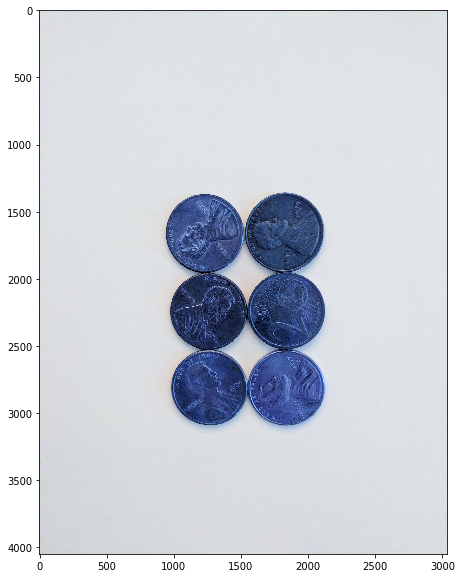

In [4]:
display(sep_coins)

In [5]:
#median blur-get rid of faces on coins
#grayscale and then apply binary threshold in order to make it blck and white
#and then we can find contours

In [7]:
sep_blur=cv2.medianBlur(sep_coins,25)

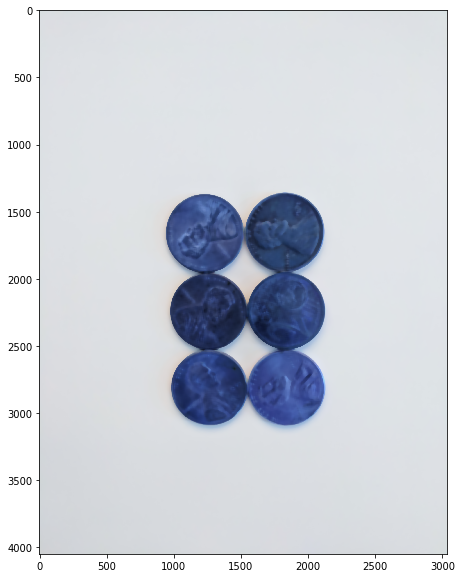

In [8]:
display(sep_blur)

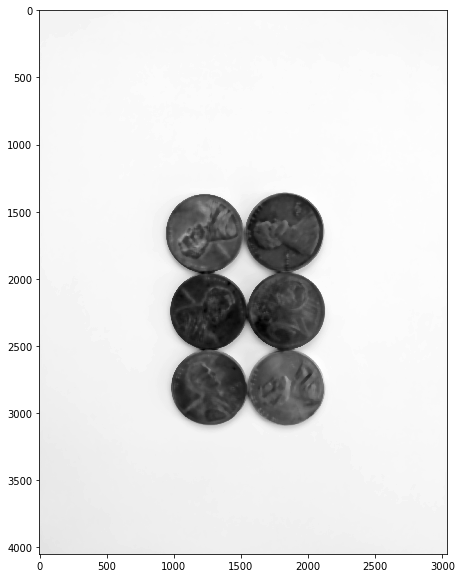

In [10]:
gray_sep=cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display(gray_sep)

In [11]:
ret,sep_threshold=cv2.threshold(gray_sep,160,255,cv2.THRESH_BINARY_INV)

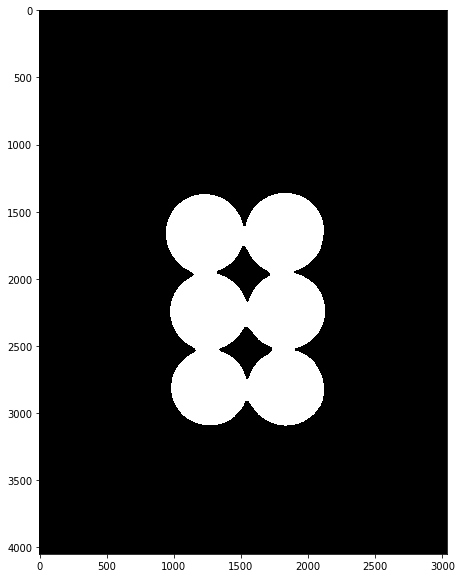

In [12]:
display(sep_threshold)

In [18]:
contours,heirarchy=cv2.findContours(sep_threshold.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [22]:
for i in range(len(contours)):
    if heirarchy[0][i][3]==-1:
        cv2.drawContours(sep_blur, contours,i,(255,0,0),10)

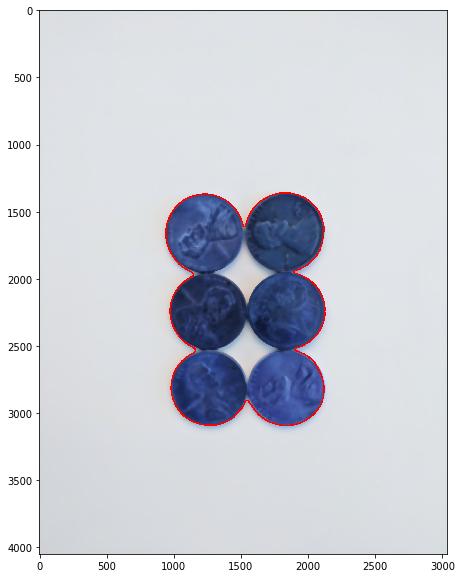

In [23]:
display(sep_blur)

In [24]:
#watergsed algooo---------------
img=cv2.imread('DATA/pennies.jpg')


In [37]:
img=cv2.medianBlur(img,35)

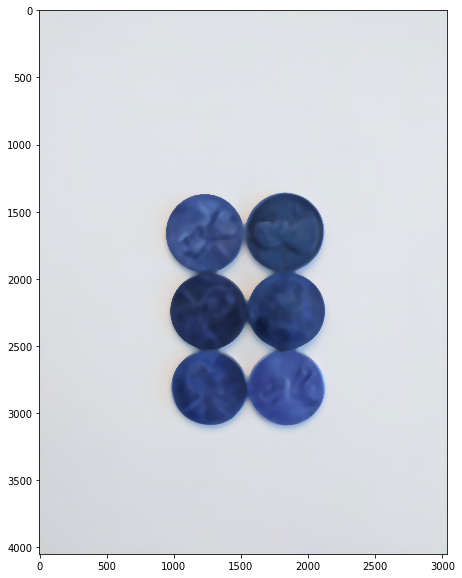

In [38]:
display(img)

In [39]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [42]:
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

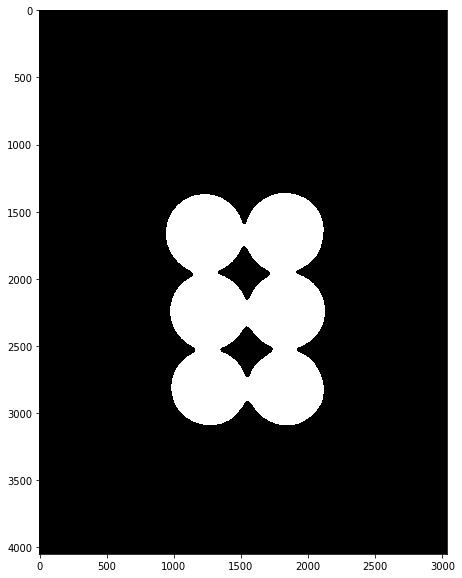

In [43]:
display(thresh)

In [44]:
#NOISE REMOVAL(OPTIONAL)

In [45]:
kernel=np.ones((3,3),np.uint8)

In [47]:
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

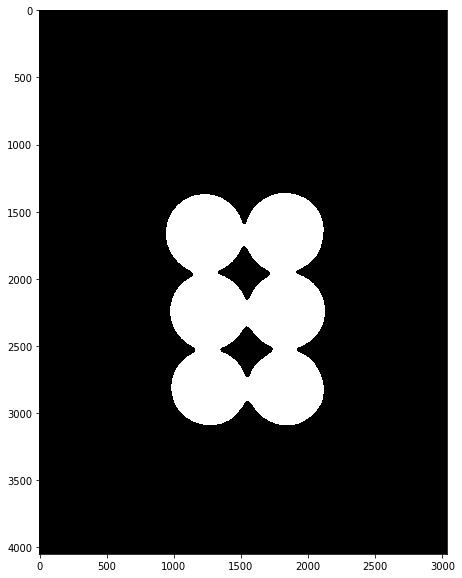

In [50]:
display(opening)

In [52]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)

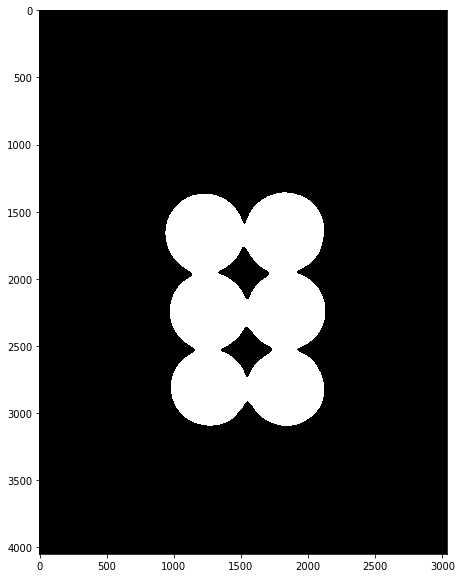

In [53]:
display(sure_bg)

In [49]:
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)

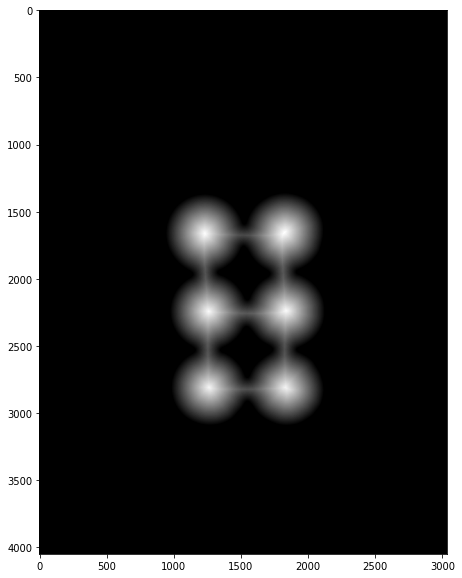

In [54]:
display(dist_transform)

In [55]:
ret,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

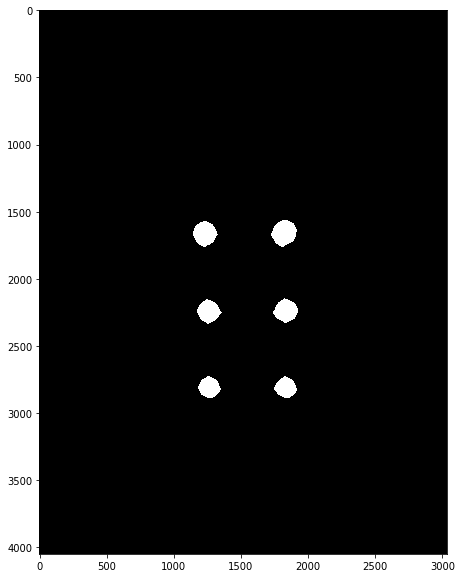

In [56]:
display(sure_fg)

In [57]:
sure_fg=np.uint8(sure_fg)

In [58]:
unknown=cv2.subtract(sure_bg,sure_fg)

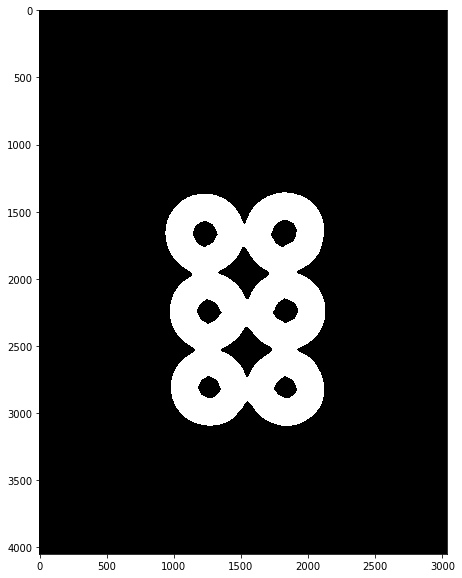

In [59]:
display(unknown)

In [60]:
ret,markers=cv2.connectedComponents(sure_fg)

In [61]:
markers=markers+1

In [64]:
markers[unknown==255]=0

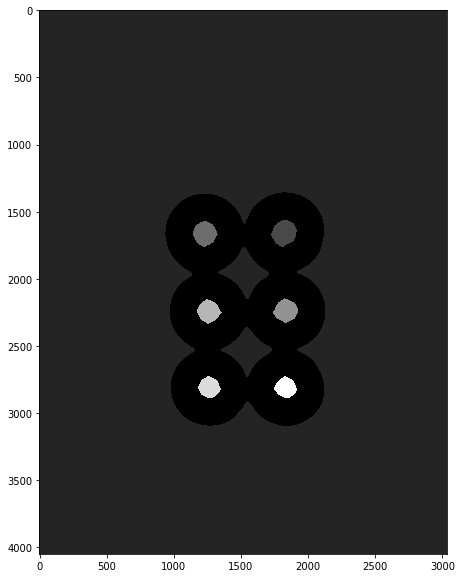

In [65]:
display(markers)

In [66]:
markers=cv2.watershed(img,markers)

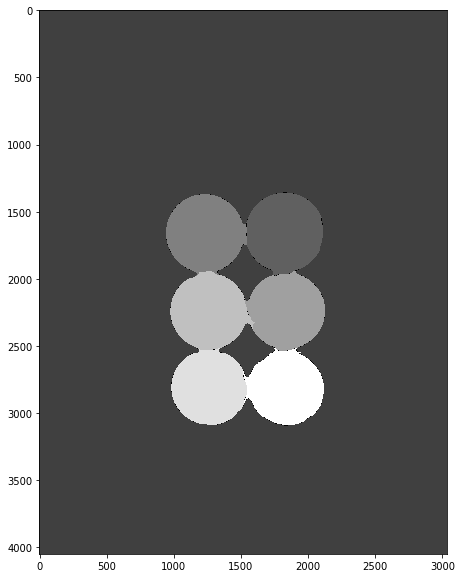

In [67]:
display(markers)

In [68]:
contours,heirarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [69]:
for i in range(len(contours)):
    if heirarchy[0][i][3]==-1:
        cv2.drawContours(sep_blur, contours,i,(255,0,0),10)

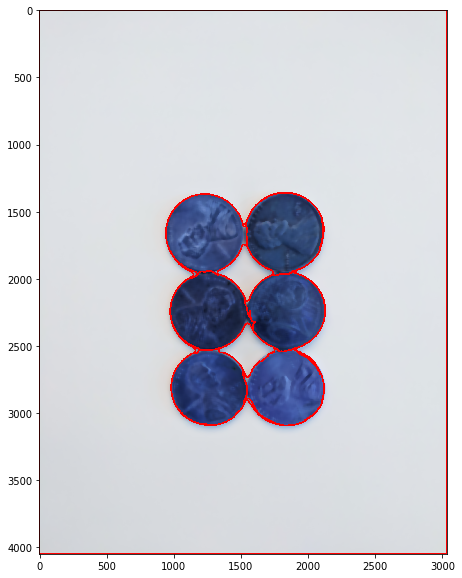

In [70]:
display(sep_blur)